# Loading and working with Strava activity data
some code from : https://alancouzens.com/blog/get_data_from_fit_file.html

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from fitparse import FitFile
import glob
import os
import gzip

In [15]:
activities = pd.read_csv('/Users/emmaboudreau/Downloads/export_129463343/activities.csv')
activities['Distance'] = pd.to_numeric(activities['Distance'], errors='coerce')
gpx_dir = '/Users/emmaboudreau/Downloads/export_129463343/activities/'
gpx_dir = '/Users/emmaboudreau/Downloads/export_129463343/activities/'
run_gpx = glob.glob(os.path.join(gpx_dir, "*.fit.gz"))

In [17]:
# Only look at desired columns
cols = ['Distance', 'Elapsed Time','Moving Time','Max Heart Rate','Average Heart Rate','Elevation Gain','Max Grade','Activity ID','Activity Type','Average Cadence','Average Elapsed Speed']
activities = activities[cols]
run_activities = activities[activities['Activity Type']=='Run']
run_ids = run_activities['Activity ID']

In [20]:
# Decompress .fit.gz to bytes in memory
def load_fit_from_gz(filepath):
    with gzip.open(filepath, 'rb') as f:
        fit_data = f.read()
    return fit_data
filepath = run_gpx[0]
fit_data = load_fit_from_gz(filepath)

# FitFile can accept bytes now
fit_file = FitFile(fit_data)

In [ ]:
# Get a sense of what the data looks liek
# Print varibale name, value, and units if applicable
for record in fit_file.get_messages("record"):
    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    for data in record:
        # Print the name and value of the data (and the units if it has any)
        if data.units:
            print(f"{data.name}, {data.value}, {data.units}")
        else:
            print(f"{data.name} {data.value}")

In [29]:
alt = []
lat = []
lon = []
distance = []
timestamp = []
for record in fit_file.get_messages("record"):
    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    for data in record:
        # Print the name and value of the data (and the units if it has any)
        if data.name == 'enhanced_altitude':
            alt.append(data.value)
        if data.name == 'position_lat':
            lat.append(data.value)
        if data.name == 'position_long':
            lon.append(data.value)
        if data.name == 'timestamp':
            timestamp.append(data.value)
        if data.name == 'distance':
            distance.append(data.value)


In [ ]:
# get elapsed time from timestamp
elapsed_time = []   
for i in range(len(timestamp)):
    if i == 0:
        timestep = 0
    else:
        # Calculate time difference in seconds
        timestep = (timestamp[i] - timestamp[0]).total_seconds()
        elapsed_time.append(timestep)



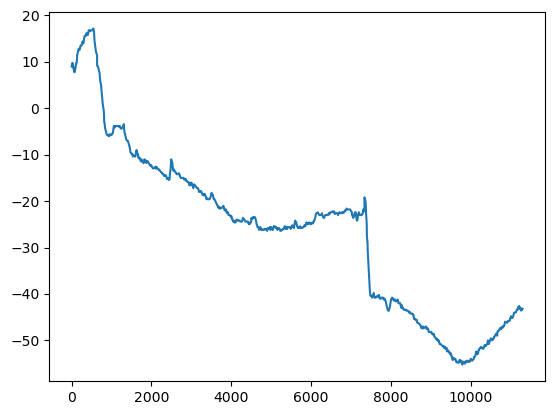

In [ ]:
# x = []
# for i in range(len(alt)):
#   x.append(i)

fig, ax = plt.plot()
ax.plot(distance, alt)
plt.show()